In [95]:
import pandas as pd

In [103]:
df = pd.DataFrame({'date':pd.date_range("2018-01-01", periods=12, freq="MS"),
                   'value':range(0,12)})
df.set_index('date', inplace= True)
df.head(3)
df.index.name = None

,value
2018-01-01,0
2018-02-01,1
2018-03-01,2
2018-04-01,3
2018-05-01,4
2018-06-01,5
2018-07-01,6
2018-08-01,7
2018-09-01,8
2018-10-01,9


In [88]:
df.resample("Q").agg("sum")

,value
date,
2018-03-31,3
2018-06-30,12
2018-09-30,21
2018-12-31,30


In [71]:
type(df)

pandas.core.frame.DataFrame

In [89]:
df.columns

Index(['value'], dtype='object')

In [91]:
df = pd.DataFrame({'value':range(0,12)},index=pd.date_range("2018-01-01", periods=12, freq="MS"))
df

,value
2018-01-01,0
2018-02-01,1
2018-03-01,2
2018-04-01,3
2018-05-01,4
2018-06-01,5
2018-07-01,6
2018-08-01,7
2018-09-01,8
2018-10-01,9


<AxesSubplot:>

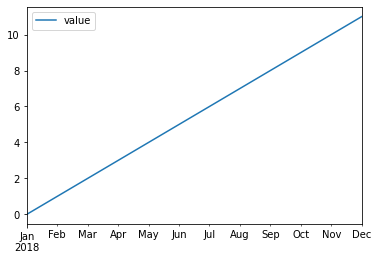

In [75]:
df.plot()

In [36]:
df.resample("Q").agg("sum")

,value
2018-03-31,3
2018-06-30,12
2018-09-30,21
2018-12-31,30


In [29]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.index = pd.DatetimeIndex(df.date)
type(df)

pandas.core.frame.DataFrame

,value
2018-03-31,3
2018-06-30,12
2018-09-30,21
2018-12-31,30
